In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Load your dataset
data = pd.read_csv('DATA.csv')
data.drop(columns=['Soil Type'], inplace=True)

In [ ]:
# Define the features and target variable
X = data.drop(columns=["Hg/Ha_Yield"]).values
y = data["Hg/Ha_Yield"].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def fitness(features):
    X_train_subset = X_train[:, features]
    X_test_subset = X_test[:, features]
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_subset, y_train)
    return accuracy_score(y_test, clf.predict(X_test_subset))

In [ ]:
def hybrid_genetic_algorithm(population_size=10, num_generations=20, mutation_rate=0.1, crossover_rate=0.8):
    # Initialize population using Latin Hypercube Sampling
    population = latin_hypercube_sampling(population_size, X.shape[1])

    best_fitness_scores = []
    best_solution = None
    best_fitness = 0
    selected_features = []

    for generation in range(num_generations):
        # Evaluate fitness of each individual in the population
        fitness_scores = [fitness(features) for features in population]

        # Preserve elite individuals
        elite_indices = np.argsort(fitness_scores)[-2:]
        elites = [(population[i], fitness_scores[i]) for i in elite_indices]

        # Update best solution found so far
        max_fitness_index = np.argmax(fitness_scores)
        if fitness_scores[max_fitness_index] > best_fitness:
            best_solution = population[max_fitness_index]
            best_fitness = fitness_scores[max_fitness_index]

        # Scale fitness scores
        scaled_fitness_scores = scale_fitness(fitness_scores)

        # Select parents for crossover
        parent_indices = select_parents(scaled_fitness_scores, population_size)
        parents = [population[i] for i in parent_indices]

        # Generate offspring using crossover
        children = []
        for i in range(0, population_size - len(elites), 2):
            parent1, parent2 = parents[i], parents[i + 1]
            child1, child2 = crossover(parent1, parent2, crossover_rate)
            children.extend([child1, child2])

        # Apply mutation
        for i in range(len(children)):
            children[i] = mutate(children[i], mutation_rate)

        # Combine elites and children to form new population
        population = [elite[0] for elite in elites] + children

        # Record best fitness score of current generation
        best_fitness_scores.append(max(fitness_scores))

        # Record selected features of the best solution
        if max_fitness_index is not None:
            selected_features.append(population[max_fitness_index])

    return best_solution, best_fitness_scores, selected_features

In [ ]:
def latin_hypercube_sampling(population_size, num_features):
    population = []
    for _ in range(population_size):
        sample = np.random.permutation(num_features)
        population.append(sample)
    return population


In [ ]:
def scale_fitness(fitness_scores):
    return np.array(fitness_scores) / sum(fitness_scores)

# Function to select parents for crossover
def select_parents(scaled_fitness_scores, population_size):
    return np.random.choice(range(len(scaled_fitness_scores)), size=population_size, p=scaled_fitness_scores)

In [ ]:
def crossover(parent1, parent2, crossover_rate):
    if np.random.rand() < crossover_rate:
        crossover_point = np.random.randint(1, len(parent1))
        child1 = np.hstack((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.hstack((parent2[:crossover_point], parent1[crossover_point:]))
        return child1, child2
    else:
        return parent1, parent2

In [ ]:
# Function for mutation
def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

In [ ]:
best_solution, best_fitness_scores, selected_features = hybrid_genetic_algorithm(population_size=10, num_generations=20, mutation_rate=0.1, crossover_rate=0.8)


In [ ]:
avg_fitness_score = sum(best_fitness_scores) / len(best_fitness_scores)

# Print the best solution found
print("Best solution:", best_solution)
print("Best fitness:", max(best_fitness_scores))
print("Average fitness score:", avg_fitness_score)

# Print selected features and their fitness scores
print("Selected features:", selected_features)
print("Fitness scores:", best_fitness_scores)

Best solution: [  7   2 -11   4  -1   0  -9   8   9   5 -10  -6   1]
Best fitness: 0.01610305958132045
Average fitness score: 0.014734299516908213
Selected features: [array([ 1,  2,  5, 12,  0,  9,  8, 10, 11,  7,  6,  3,  4]), array([ 7,  2, 12,  5, -1, -9,  1,  1,  9,  7, 11,  6, -7]), array([-6,  2, 12,  4,  2,  0, 10,  8,  9,  5, 11, -6,  1]), array([-6,  2, 12,  4,  2,  0, 10,  8,  9,  5, 11,  7,  1]), array([-6,  2, 12,  4,  2,  0, 10,  8,  9,  5, 11,  7,  1]), array([-6,  2, 12,  4,  2,  0, 10,  8,  9,  5, 11, -6,  1]), array([-6,  2, 12,  4,  2,  0, 10,  8,  9,  5, 11,  7,  1]), array([-6,  2, 12,  4,  2,  0, 10,  8,  9,  5, 11, -6,  1]), array([-6,  2, 12,  4,  2,  0, 10,  8,  9,  5, 11, -6,  1]), array([-6,  2, 12,  4,  2,  0, 10,  8,  9,  5, 11,  7,  1]), array([ 7,  2, 12,  4,  2,  0, 10,  8,  9,  5, 11, -6,  1]), array([ 7,  2, 12,  4,  2,  0, 10,  8,  9,  5, 11, -6,  1]), array([  7,   2, -11,   4,   2,   0,  -9,   8,   9,   5, -10,  -6,   1]), array([-6,  2, 12,  4,  2, 

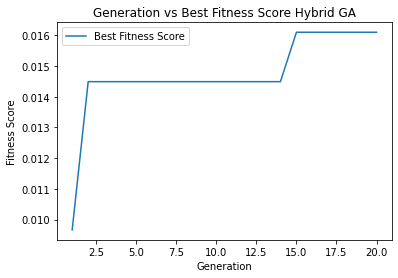

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(best_fitness_scores) + 1), best_fitness_scores, label='Best Fitness Score')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.title('Generation vs Best Fitness Score Hybrid GA')
plt.legend()
plt.show()